# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.

Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. 

Будем работать с данными, опубликованными на [портале открытых данных Министерства культуры](http://opendata.mkrf.ru/). Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

### Цели
Ответить на вопрос, насколько фильмы с государственной поддержкой интересны зрителю.

### Описание данных
Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` *—* объём возвратных средств государственной поддержки;
- `nonrefundable_support` *—* объём невозвратных средств государственной поддержки;
- `financing_source` *—* источник государственного финансирования;
- `budget` *—* общий бюджет фильма;
- `ratings` *—* рейтинг фильма на КиноПоиске;
- `genres` *—* жанр фильма.

Столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

### План работ

**Шаг 1.** **Изучим файлы с данными**
1. Загрузим данные из файлов в датафрейм.
2. Изучим общую информацию о полученном датафрейме.

**Шаг 2. Предобработка данных**

1. Найдём и изучим пропущенные значения в столбцах
2. Рассмотрим типы данных в каждом столбце
3. Изучим уникальные значения и дубликаты

**Шаг 3. Проведём исследовательский анализ данных:**

1. Изучим параметры фильмов
2. Посмотрим, какие факторы больше всего влияют на целевые задачи исследования

**Шаг 5. Сделаем выводы и дадим рекомендации**

## Знакомство с данными

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Избавимся от экспоненты
pd.options.display.float_format = '{:,.1f}'.format


In [2]:
# загружаем датасет из файла
try:
    # в качестве разделителя колонок используется табуляция
    data1 = pd.read_csv('/datasets/mkrf_movies.csv')
    data2 = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    # в качестве разделителя колонок используется табуляция
    data1 = pd.read_csv('../datasets/mkrf_movies.csv')
    data2 = pd.read_csv('../datasets/mkrf_shows.csv')

In [3]:
# выведем первые 5 строк датасета для ознакомления
data1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


- Есть пропуски
- Есть дублирующиеся названия (с разными прокатными удостоверениями - в описании к данным об этом говорилось)
- Много категорийных столбцов с текстовым наполнением - это потенциально может приводить к неявным дубликатам из-за лишних символов, неодинакового порядка перечислений или различных разделителей

In [4]:
# общая информация о датафрейме
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

- Всего 7486 строк
- Данные о государственной поддержке только у 332 фильмов
- Есть пропуски во многих столбцах

In [5]:
# посмотрим на второй датафрейм
data2.head()

,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"


In [6]:
# общая информация о датафрейме
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Тип данных `puNumber` в датафреймах не совпадает - `object` и `int64`.
При попытке приведения к `int64` столкнулись с аномальным значением `нет`.  

In [7]:
# смотрим, много ли аномальных значений
data1.query('puNumber == "нет"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


такое значение встречается только одно. Это фильм без господдержки, у него нет рейтинга. Решаем удалить эту строку из датасета.

In [8]:
# удаляем строку с аномальным значением из датасета
data1 = data1.drop(labels=1797, axis=0)

In [9]:
# приводим тип данных прокатного удостоверения в первом датафрейме к int64
data1 = data1.astype({'puNumber' : 'int64'})
data1.dtypes

title                     object
puNumber                   int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
dtype: object

In [10]:
# Объединяем датафреймы по параметру puNumber таким образом, 
# чтобы все объекты из датасета `mkrf_movies` вошли в получившийся датафрейм. 
data = data1.merge(data2, how='left', on='puNumber')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [12]:
# переименуем столбец puNumber в pu_number
data = data.rename(columns={'puNumber':'pu_number'})

In [13]:
# проверяем объединение
data.shape

(7485, 16)

Количество строк сохранилось, столбец из второго файла добавился

In [14]:
# посмотрим на пропуски
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

In [15]:
# описание количественных данных
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,box_office
count,"7,485.0",332.0,332.0,332.0,"3,158.0"
mean,"135,196,587.6","11,864,457.8","48,980,988.9","127,229,716.7","76,478,696.2"
std,"38,352,919.3","24,916,555.3","59,980,117.9","188,588,333.1","240,353,122.8"
min,"1,811,096.0",0.0,0.0,0.0,0.0
25%,"112,025,118.0",0.0,"25,000,000.0","42,000,000.0","86,239.0"
50%,"121,015,510.0",0.0,"30,000,000.0","68,649,916.0","2,327,987.5"
75%,"124,003,314.0","15,000,000.0","40,375,000.0","141,985,319.5","23,979,671.0"
max,"231,001,111.0","180,000,000.0","400,000,000.0","2,305,074,303.0","3,073,568,690.8"


In [16]:
# типы данных
data.dtypes

title                     object
pu_number                  int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

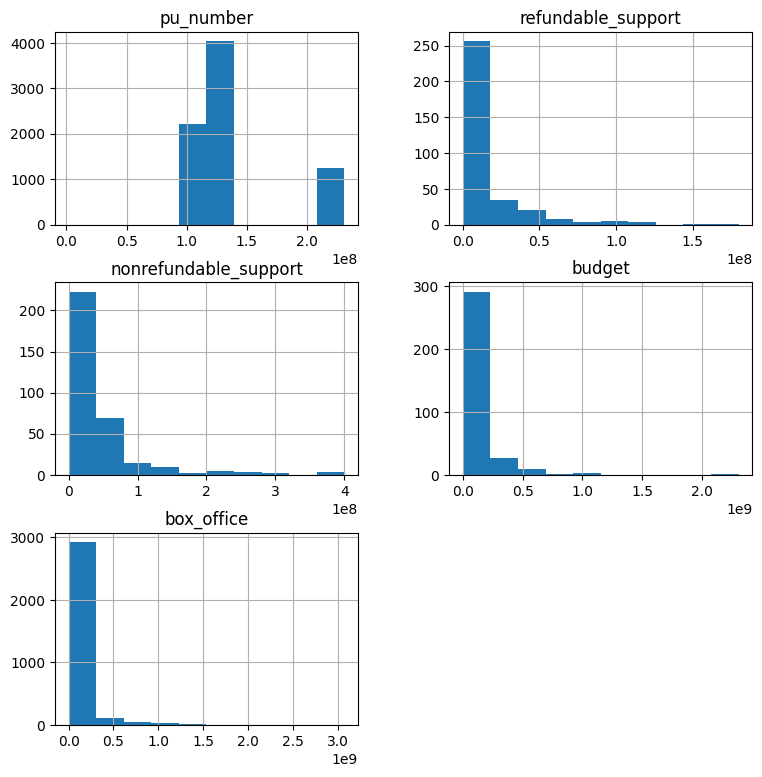

In [17]:
data.hist(figsize=(9,9))
plt.show()

In [18]:
# проверим, есть ли полные дубликаты 
data.duplicated().sum()

0

### Промежуточные итоги

Мы считали данные из двух файлов и объединили датафреймы по номеру прокатного утостоверения
Мы столкнулись с несоответствием типов данных этого столбца в разных датафреймах, и нашли аномальное значение, от которого решили избавиться (удалить строку)
Остался единый датафрейм из 7485 строк и 16 столбцов

- Есть пропуски
- Есть дублирующиеся названия (с разными прокатными удостоверениями - в описании к данным об этом говорилось)
- Много категорийных столбцов с текстовым наполнением - это потенциально может приводить к неявным дубликатам из-за лишних символов, неодинакового порядка перечислений или различных разделителей

## Шаг 2. Предобработка данных

In [19]:
# создадим отдельную переменную для очищенных данных
clean_data = data.copy()

### Шаг 2.1. Типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [20]:
# ещё раз выведем типы данных
clean_data.dtypes

title                     object
pu_number                  int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

- `show_start_date` — дата премьеры фильма - преобразуем в `datetime`
- `ratings` *—* рейтинг фильма на КиноПоиске - преобразуем в `float`, (в столбце много пустых значений)

Категорийные столбцы оставим строковыми

In [21]:
# применяем datetime для даты премьеры фильма
clean_data['show_start_date'] = pd.to_datetime(clean_data['show_start_date'])


при попытке приведения типа данных рейтинга выяснилось, что там есть значения с %

In [22]:
# посмотрим на данные с процентным рейтингом
clean_data[clean_data['ratings'].str.contains('%', na=False)].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06 12:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия","1,740.0"
1053,Песочный человек,121029212,2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1804,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы","4,295.0"


In [23]:
clean_data[clean_data['ratings'].str.contains('%', na=False)].count()

title                    29
pu_number                29
show_start_date          29
type                     29
film_studio              29
production_country       29
director                 29
producer                 29
age_restriction          29
refundable_support        2
nonrefundable_support     2
budget                    2
financing_source          2
ratings                  29
genres                   26
box_office               15
dtype: int64

Мы проверили на Кинопоиске несколько фильмов - рейтинг ошибочен не только форматированием, но и значением. Эти данные - всё равно что пропуски, заполним их NaN

In [24]:
# завершим преобразование
clean_data.loc[clean_data['ratings'].str.contains('%', na=False), 'ratings'] = np.nan
clean_data.astype({'ratings' : 'float'}).dtypes

title                                 object
pu_number                              int64
show_start_date          datetime64[ns, UTC]
type                                  object
film_studio                           object
production_country                    object
director                              object
producer                              object
age_restriction                       object
refundable_support                   float64
nonrefundable_support                float64
budget                               float64
financing_source                      object
ratings                              float64
genres                                object
box_office                           float64
dtype: object

### Шаг 2.2. Пропуски в датафрейме

In [25]:
clean_data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64

- `film_studio` - если информации нет, можно заполнить значением `unknown`
- `production_country` - если информации нет, можно заполнить значением `unknown`
- `director` - если информации нет, можно заполнить значением `unknown`
- `producer` - если информации нет, можно заполнить значением `unknown`
- `refundable_support` - если информации нет, поддержки не было, можно заполнить `0`     
- `nonrefundable_support` - если информации нет, поддержки не было, можно заполнить `0`
- `budget` - если информации нет, поддержки не было, но заполнить `0` кажется неправильно, так как бюджет всё же не нулевой                   
- `financing_source` - если информации нет, поддержки не было, можно заполнить `none`         
- `ratings` - если информации нет, заполнить `0` кажется неправильно, так как рейтинг всё же не нулевой
- `genres` - если информации нет, можно заполнить значением `unknown`
- `box_office` - если информации нет, заполнить `0` кажется неправильно, так как рейтинг всё же не нулевой

In [26]:
# проверяем пустые значения 
clean_data[clean_data['film_studio'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# заменим пропуски на unknown
clean_data['film_studio'] = clean_data['film_studio'].fillna('unknown')

In [28]:
# проверяем пустые значения 
clean_data[clean_data['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия","194,527.0"
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,unknown,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Судя по названиям, студиям и году выпуска, можно заполнить пустые значения `Россия`

In [29]:
# заменим пропуски на Россия
clean_data['production_country'] = clean_data['production_country'].fillna('Россия')

In [30]:
# проверяем пустые значения 
clean_data[clean_data['director'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.0"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# заменим пропуски на unknown
clean_data['director'] = clean_data['director'].fillna('unknown')

In [32]:
# проверяем пустые значения 
clean_data[clean_data['producer'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.0"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN


In [33]:
# заменим пропуски на unknown
clean_data['producer'] = clean_data['producer'].fillna('unknown')

In [34]:
# проверяем пустые значения 
clean_data[clean_data['refundable_support'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [35]:
# так как не было гос поддержки, заменим на 0
clean_data['refundable_support'] = clean_data['refundable_support'].fillna(0)

In [36]:
# проверяем пустые значения 
clean_data[clean_data['nonrefundable_support'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.0,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [37]:
# так как не было гос поддержки, заменим на 0
clean_data['nonrefundable_support'] = clean_data['nonrefundable_support'].fillna(0)

In [38]:
# проверяем пустые значения 
clean_data[clean_data['budget'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.0,0.0,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [39]:
clean_data['budget'].value_counts()

0.0              17
38,000,000.0      6
80,000,000.0      4
50,000,000.0      4
40,000,000.0      3
                 ..
49,280,496.0      1
56,693,559.0      1
57,166,797.0      1
109,814,241.0     1
42,252,509.0      1
Name: budget, Length: 290, dtype: int64

In [40]:
clean_data['budget'].isna().sum()

7153

Решили не обнулять значения бюджета, но посмотрим на строки, в которых и так бюджет задан 0

In [41]:
clean_data[clean_data['budget'] == 0].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,"23,000,000.0",0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.1"
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"75,000,000.0",0.0,Фонд кино,6.6,драма,"446,163,511.0"
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.0","70,000,000.0",0.0,Фонд кино,7.8,"боевик,драма,криминал","196,572,438.4"
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.0",0.0,0.0,Фонд кино,6.2,"комедия,фэнтези","67,418,974.8"
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.0","100,000,000.0",0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези","184,487,551.4"


Похоже на аномалию, так как по описанию Столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Значит, он не может быть меньше суммы поддержки. Обработаем это далее.

In [42]:
# проверяем пустые значения 
clean_data[clean_data['ratings'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,0.0,0.0,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",unknown,«6+» - для детей старше 6 лет,0.0,0.0,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,unknown,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,unknown,«12+» - для детей старше 12 лет,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Решили не обнулять значения рейтинга

In [43]:
# проверяем пустые значения 
clean_data[clean_data['genres'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,0.0,0.0,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",unknown,«6+» - для детей старше 6 лет,0.0,0.0,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,unknown,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,unknown,«12+» - для детей старше 12 лет,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [44]:
# заменим пропуски на unknown
clean_data['genres'] = clean_data['genres'].fillna('unknown')

In [45]:
# проверяем пустые значения 
clean_data[clean_data['box_office'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.0,0.0,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [46]:
clean_data['box_office'].value_counts()

0.0              24
200.0            13
300.0            12
360.0             9
400.0             8
                 ..
9,585,014.0       1
809,638,458.6     1
220,728.0         1
11,332,412.0      1
52,984,377.0      1
Name: box_office, Length: 2938, dtype: int64

In [47]:
clean_data[clean_data['box_office'] == 0].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,unknown,«6+» - для детей старше 6 лет,0.0,0.0,NaN,NaN,7.7,"драма,биография,музыка",0.0
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,unknown,«12+» - для детей старше 12 лет,0.0,0.0,NaN,NaN,8.2,драма,0.0
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,6.3,комедия,0.0
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,0.0,0.0,NaN,NaN,6.5,"драма,военный,история",0.0
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,0.0,0.0,NaN,NaN,7.4,"аниме,мультфильм,драма",0.0


In [48]:
# проверяем значения financing_source
clean_data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [49]:
# заменим пропуски на none
clean_data['financing_source'] = clean_data['financing_source'].fillna('none')

In [50]:
clean_data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                   7153
financing_source            0
ratings                   995
genres                      0
box_office               4327
dtype: int64

Оставили три столбца с пропусками, чтобы не обнулять количественные значения:
- `budget`                   
- `ratings`
- `box_office`

### Шаг 2.3. Дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты.

In [51]:
clean_data.duplicated(subset=['title']).sum()

714

Если проверять только по названию фильма, то дубликатов достаточно много. Однако в описании к данным указано, что у одного фильма может быть несколько прокатных удостоверений. Возможно, это и приводит к дубликатам.

In [52]:
clean_data.duplicated(subset=['pu_number']).sum()

2

Есть дубликаты номеров прокатных удостоверений.

In [53]:
clean_data[clean_data.duplicated(subset=['pu_number'], keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,7.6,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,6.8,"комедия,криминал",NaN


Фильмы разные, оставим как есть. Вероятно, ошибка в данных.

In [54]:
clean_data.duplicated(subset=['title', 'pu_number']).sum()

0

Дубликатов по названию и удостоверению нет

Посмотрим дубликаты по набору столбцов, не включающих прокатное удостоверение и дату

In [55]:
# столбцы для копирования
clean_data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [56]:
# поиск дубликатов
clean_data.duplicated(subset=['title', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office']).sum()

484

In [57]:
# вывод дубликатов
clean_data[clean_data.duplicated(subset=['title', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'])].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,none,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,none,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,6.4,"мелодрама,комедия",NaN
132,Джейн Эйр /По одноименному роману Шарлотты Бро...,221035716,2016-06-07 12:00:00+00:00,Художественный,"Чинеритино, Флаш Фильм, Медиасет, Мирамакс, Ро...",Франция - Италия - Великобритания - США,Франко Дзеффирелли,unknown,«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,7.4,"драма,мелодрама",NaN
205,Кинг Конг _,221001815,2015-02-11 12:00:00+00:00,Художественный,"Биг Праймейт Пикчерз, Юниверсал Пикчерз, ВингН...",Новая Зеландия - США,Питер Джексон,"Йен Бленкин, Питер Джексон, Кэролайн Каннингэм...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,7.6,"боевик,драма,мелодрама",NaN


In [58]:
# очистка дубликатов
clean_data.drop_duplicates(subset=['title', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'], inplace=True)

In [59]:
# посмотрим на оставшиеся дубликаты по названиям
clean_data[clean_data.duplicated(subset=['title'], keep=False)].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
86,Валентина,111012713,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Панфилов,unknown,«6+» - для детей старше 6 лет,0.0,0.0,NaN,none,7.5,драма,NaN
109,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,221004916,2016-02-09 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,7.7,"фэнтези,приключения,семейный",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,7.7,"фэнтези,приключения,семейный","759,526.0"
111,Гарри Поттер и тайная комната /По роману Дж.К....,121026016,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хедэй Филмз/1492 Пикчерз",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,8.0,"фэнтези,приключения,семейный","1,093,810.0"
112,Гарри Поттер и узник Азкабана /По роману Дж.К....,221005016,2016-02-09 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,8.2,"фэнтези,приключения,семейный",NaN


Есть дубликаты, для которых указан / не указан прокат `box_office`. Очистим и их тоже.

In [60]:
# поиск дубликатов
clean_data.duplicated(subset=['title', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres']).sum()

178

In [61]:
# сортируем по наличию значения box_office и чистим дубликаты, оставляя первое вхождение
clean_data = clean_data.sort_values(by='box_office')
clean_data.drop_duplicates(subset=['title', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'], inplace=True)

In [62]:
# проверяем после чистки
clean_data.duplicated(subset=['title', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres']).sum()

0

In [63]:
# остатки дубликатов по названию
clean_data.duplicated(subset=['title'], keep=False).sum()

101

In [64]:
clean_data[clean_data.duplicated(subset=['title'], keep=False)].sort_values(by='title').head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7264,Альдабра: Путешествие по таинственному острову,126003719,2019-09-30 12:00:00+00:00,Прочие,Старлайт Пикчерз,Чехия,Стив Лихтаг,"Петр Келлер, Роберт Шнайдер, Леопольдо Гоут",«6+» - для детей старше 6 лет,0.0,0.0,NaN,none,6.8,"семейный,приключения,документальный",NaN
3725,Альдабра: Путешествие по таинственному острову,126005616,2016-10-19 12:00:00+00:00,Прочие,Старлайт Пикчерз,Чехия,Стив Лихтаг,"Леопольдо Гоут, Петр Келлер, Роберт Шнайдер",«6+» - для детей старше 6 лет,0.0,0.0,NaN,none,6.8,"семейный,приключения,документальный","5,484,100.4"
6551,Аниматор,111024818,2018-12-26 12:00:00+00:00,Художественный,"ООО ""ФАВОРИТ МЕДИА""",Россия,"А.Чижиков, И.Чижиков","А.Чижиков, Н.Чижикова",«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,NaN,unknown,NaN
5835,Аниматор,111003818,2018-04-29 12:00:00+00:00,Художественный,"ЗАО ""Кинокомпания ФаворитФильм"" по заказу ООО...",Россия,"А.Чижиков, И.Чижиков","А.Чижиков, Н.Чижикова",«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,NaN,unknown,NaN
7312,Безумный Макс: Дорога ярости,121030019,2019-12-06 12:00:00+00:00,Художественный,Уорнер Бразерс Пикчерс,"Австралия, США",Джордж Миллер,"Джордж Миллер, Даг Митчелл, Брюс Берман",«18+» - запрещено для детей,0.0,0.0,NaN,none,7.8,"боевик,фантастика,приключения",NaN
2560,Безумный Макс: Дорога ярости,121009615,2015-04-27 12:00:00+00:00,Художественный,"Кеннеди Миллер Продакшнз, Виллидж Роадшоу Пикч...",США - Австралия,Джордж Миллер,"Джордж Миллер, Дуг Митчел",«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,7.8,"боевик,фантастика,приключения","650,165,993.5"
6673,Большая игра,111001819,2019-02-28 12:00:00+00:00,Художественный,"ООО ""ГГФ"" по заказу АО ""Сеть телевизионных ста...",Россия,Б.Батуллин,А.Марченко,«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,7.6,"драма,криминал,биография",NaN
5670,Большая игра,121027917,2018-01-11 12:00:00+00:00,Художественный,"Интертейнмент Уан, Паскаль Пикчерз, Марк Гордо...",США,Аарон Соркин,"Марк Гордон, Эми Паскаль",«18+» - запрещено для детей,0.0,0.0,NaN,none,7.6,"драма,криминал,биография","77,806,917.3"
3393,В тихом омуте,121018516,2016-06-21 12:00:00+00:00,Художественный,"Зэ Бэ Продуцион, Твенти Твенти Вижн Филмпродуц...",Германия - Франция,Брюно Дюмон,"Жан Бреа, Рашид Бушареб, Мюриэль Мерлин",«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,6.8,"триллер,криминал,детектив","2,883,624.0"
7449,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,0.0,0.0,NaN,none,6.8,"триллер,криминал,детектив",NaN


Остальные дубликаты по названию могут оказаться разными фильмами, могут иметь разную запись в категориальных столбцах. Оставим их.

In [65]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6823 entries, 1782 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6823 non-null   object             
 1   pu_number              6823 non-null   int64              
 2   show_start_date        6823 non-null   datetime64[ns, UTC]
 3   type                   6823 non-null   object             
 4   film_studio            6823 non-null   object             
 5   production_country     6823 non-null   object             
 6   director               6823 non-null   object             
 7   producer               6823 non-null   object             
 8   age_restriction        6823 non-null   object             
 9   refundable_support     6823 non-null   float64            
 10  nonrefundable_support  6823 non-null   float64            
 11  budget                 332 non-null    float64       

### Шаг 2.4. Категориальные значения

In [66]:
clean_data['type'].value_counts()

Художественный                3929
 Художественный               1388
Анимационный                   774
Прочие                         395
Документальный                 283
Научно-популярный               52
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

В поле `type` несколько значений, у которых появился пробел в начале строки.

In [67]:
clean_data['type'] = clean_data['type'].str.strip()

In [68]:
clean_data['type'].value_counts()

Художественный                5317
Анимационный                   775
Прочие                         395
Документальный                 283
Научно-популярный               52
Музыкально-развлекательный       1
Name: type, dtype: int64

In [69]:
clean_data['film_studio'].value_counts() 

Киностудия "Мосфильм"                                                                339
ООО "Мульт в кино"                                                                    57
Анимаккорд Лтд                                                                        23
ООО "Мульт в кино"                                                                    18
unknown                                                                               17
                                                                                    ... 
Хоумфронт Продакшнз, Миллениум Филмз, Ну Имэдж Филмз                                   1
Вилдгаз Филмз, Би-Би-Си, Дэ Эс ЭМ Продуцион, Филм Фо                                   1
Юниверсал Пикчерз, Студио Канал, Рилейтивити Медиа, Уоркинг Тайтл, Антена 3 Фильм      1
Дарк Прекёрсор Продакшен, Филмиран, Хедейт Филм                                        1
ООО "Нью Арт Синема продакшн", ООО "Коллекция кино"                                    1
Name: film_studio, Le

Похоже, есть значения, у которых появился пробел в начале или конце строки.

In [70]:
clean_data['film_studio'] = clean_data['film_studio'].str.strip()

In [71]:
clean_data['film_studio'].value_counts() 

Киностудия "Мосфильм"                                                                                                                       343
ООО "Мульт в кино"                                                                                                                           75
Анимаккорд Лтд                                                                                                                               23
ООО "ТаББаК"                                                                                                                                 18
unknown                                                                                                                                      17
                                                                                                                                           ... 
"Студия "Птица Феникс" Татьяны Новиковой                                                                                                

In [72]:
clean_data['production_country'].unique()

array(['Франция', 'Япония',
       'Германия - Нидерланды - Беларусь - Россия - Латвия', 'Россия',
       'Великобритания', 'СССР', 'США', 'Канада-Великобритания',
       'Армения', 'Германия - Бельгия - США -Франция',
       'Франция-Австралия', 'СССР, Франция, Англия, Куба, ГДР', 'Канада',
       'Франция-Италия-Испания-Венгрия', 'Великобритания - Франция',
       'Франция - Бельгия', 'СССР, Финляндия', 'Россия - Германия',
       'Нидерланды', 'Япония - Канада', 'США - Новая Зеландия',
       'Франция-Аргентина', 'Франция - Италия - Бельгия - Люксембург',
       'Таиланд', 'Канада - Франция - Великобритания', 'Южная Корея',
       'Украина', 'Ирландия - Дания - Бельгия - Люксембург - Франция',
       'Россия-Германия', 'СССР, Румыния, Франция', 'Германия',
       'Финляндия - Канада', 'Россия, Казахстан, США',
       'Сербия - Германия - Венгрия', 'Франция - Швейцария - Германия',
       'Франция-Великобритания', 'Франция - Бельгия - Люксембург',
       'США - Бельгия', 'Канада - СШ

In [73]:
clean_data['production_country'].value_counts()

Россия                                                          1814
США                                                             1785
СССР                                                             345
Франция                                                          278
Великобритания                                                   241
                                                                ... 
США - Колумбия                                                     1
США-Франция-Ирландия                                               1
Израиль - Германия - Польша - Бельгия - Франция - Люксембург       1
Россия-Азербайджан                                                 1
Великобритания - США - Швейцария                                   1
Name: production_country, Length: 950, dtype: int64

In [74]:
# сделаем универсальные разделители
clean_data['production_country'] = clean_data['production_country'].str.replace(' - ', '-')
clean_data['production_country'] = clean_data['production_country'].str.replace(', ', ',')
clean_data['production_country'] = clean_data['production_country'].str.replace('-', ',')
clean_data['production_country'] = clean_data['production_country'].str.replace(',', ', ')

clean_data['production_country'].value_counts()

Россия                       1814
США                          1785
СССР                          345
Франция                       278
Великобритания                241
                             ... 
Дания, Исландия                 1
Швейцария, Великобритания       1
Великобритания, Австралия       1
Норвегия, Швеция, Дания         1
США, Великобритания             1
Name: production_country, Length: 835, dtype: int64

In [75]:
clean_data['producer'].unique()

array(['Эммануэль Жаклин, Павел Солк, Филипп Херинг',
       'Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юитиро Сайто, Нодзому Такахаси ',
       'Хайно Декерт', ..., 'ВГИК',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [76]:
clean_data['producer'].value_counts()

unknown                                                             559
П.Смирнов                                                            67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина                        28
С.Сельянов                                                           18
Д.Ловейко, О.Кузовков                                                16
                                                                   ... 
Аурелио Де Лаурентис, Луиджи Де Лаурентис младший                     1
Т.Бекмамбетов, А.Новиков, Г.Куценко                                   1
Карен Элиза Болдуин, Ховард Болдуин, Мэйс Нойфелд, Стефани Остин      1
Роберт Карсене                                                        1
Джейсон Блум, Марк Бьенсток, Дом Катанзерайт                          1
Name: producer, Length: 5350, dtype: int64

In [77]:
clean_data['director'].unique()

array(['Ариэль Зейтун', 'Мамору Хосода', 'Сергей Лозница', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [78]:
clean_data['director'].value_counts()

О.Семёнова          47
Д.Червяцов          16
Вуди Аллен          13
Стивен Содерберг    12
О.Семёнова          12
                    ..
Л.Агранович          1
Джадд Апатов         1
И.Фирсова            1
Лиз Гарбус           1
Дэнни Стронг         1
Name: director, Length: 4812, dtype: int64

In [79]:
clean_data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2526
«12+» - для детей старше 12 лет           1495
«18+» - запрещено для детей               1444
«0+» - для любой зрительской аудитории     749
«6+» - для детей старше 6 лет              609
Name: age_restriction, dtype: int64

In [80]:
clean_data['genres'].unique()

array(['драма,мелодрама,приключения', 'аниме,мультфильм,фантастика',
       'драма,военный,история', 'комедия,мелодрама',
       'мюзикл,драма,мелодрама', 'unknown', 'драма',
       'мелодрама,комедия,драма', 'драма,мелодрама,биография',
       'аниме,мультфильм,драма', 'драма,история', 'комедия',
       'боевик,комедия,криминал', 'биография', 'мелодрама,комедия',
       'драма,семейный', 'драма,биография,музыка',
       'драма,мелодрама,история', 'фэнтези,драма,мелодрама',
       'боевик,драма,криминал', 'комедия,приключения,семейный',
       'мультфильм,фэнтези,комедия', 'драма,комедия',
       'боевик,драма,приключения', 'комедия,приключения,история',
       'боевик,триллер', 'ужасы,комедия', 'фэнтези,боевик,приключения',
       'ужасы,триллер', 'триллер,драма,криминал',
       'мультфильм,фэнтези,приключения', 'мультфильм,комедия,приключения',
       'драма,мелодрама,комедия', 'комедия,приключения,музыка',
       'комедия,приключения,вестерн', 'документальный,военный,история',
    

In [81]:
clean_data['genres'].value_counts()

unknown                          968
драма                            454
комедия                          330
мелодрама,комедия                181
драма,мелодрама                  171
                                ... 
фантастика,драма,криминал          1
детектив,фэнтези,триллер           1
короткометражка,драма,военный      1
комедия,драма,военный              1
история,боевик,фэнтези             1
Name: genres, Length: 743, dtype: int64

Общая проблема почти во всех категориальных столбцах:
- перечисления нексольких объектов в разном порядке
- также встречаются разные способы разделения значений - через запятую или через `-`

### Шаг 2.5. Количественные значения

Столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Значит, он не может быть меньше суммы поддержки. 

In [82]:
# проверим подозрительные данные по бюджету
clean_data.query('budget < refundable_support + nonrefundable_support').head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6322,Баба Яга,114006518,2018-11-08 12:00:00+00:00,Анимационный,"ООО ""Арт Пикчерс Студия""",Россия,В.Саков,"ООО ""Арт Пикчерс Студия"", ООО ""КРИЭЙТИВ АНИМЭЙ...",«6+» - для детей старше 6 лет,0.0,"138,969,465.0",0.0,Фонд кино,NaN,unknown,"1,334,699.4"
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,"59,000,000.0",0.0,Фонд кино,6.3,"комедия,драма","1,957,738.5"
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,"23,000,000.0",0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.1"
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,"6,000,000.0",0.0,Министерство культуры,4.3,комедия,"15,362,931.4"
3738,Мифы,111004317,2017-06-07 12:00:00+00:00,Художественный,"ООО ""ХАЙПФИЛМ"", ООО ""Арт Пикчерс Студия""",Россия,А.Молочников,"Ф.Бондарчук, Д.Рудовский, И.Стюарт, М.Османн, ...",«16+» - для детей старше 16 лет,"25,000,000.0","20,000,000.0",0.0,Фонд кино,4.8,комедия,"50,451,949.0"


Бюджет неизвестен, однако для выборки из 332 фильмов эти данные важны. 
Предположим, что проекты реализовывались только на средства из поддержки.

In [83]:
clean_data.loc[clean_data['budget'] < clean_data['refundable_support']+clean_data['nonrefundable_support'], 'budget'] = clean_data['refundable_support']+clean_data['nonrefundable_support']

In [84]:
clean_data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,box_office
count,"6,823.0","6,823.0","6,823.0",332.0,"3,131.0"
mean,"129,719,571.7","577,312.0","2,383,363.4","131,422,395.8","75,806,663.5"
std,"32,745,440.4","6,053,077.6","16,900,585.7","187,148,242.7","238,195,652.7"
min,"1,811,096.0",0.0,0.0,"6,000,000.0",0.0
25%,"112,001,769.0",0.0,0.0,"45,524,799.5","87,802.5"
50%,"121,013,010.0",0.0,0.0,"71,196,901.5","2,338,788.5"
75%,"122,000,161.0",0.0,0.0,"150,000,000.0","23,769,707.9"
max,"231,001,012.0","180,000,000.0","400,000,000.0","2,305,074,303.0","3,073,568,690.8"


In [85]:
clean_data[clean_data['financing_source'] != 'none'].describe()

,pu_number,refundable_support,nonrefundable_support,budget,box_office
count,332.0,332.0,332.0,332.0,318.0
mean,"111,593,819.1","11,864,457.8","48,980,988.9","131,422,395.8","132,432,420.0"
std,"5,703,031.3","24,916,555.3","59,980,117.9","187,148,242.7","334,837,857.0"
min,"111,000,115.0",0.0,0.0,"6,000,000.0","1,550.0"
25%,"111,004,891.5",0.0,"25,000,000.0","45,524,799.5","1,236,675.5"
50%,"111,010,367.0",0.0,"30,000,000.0","71,196,901.5","15,720,067.7"
75%,"111,017,815.8","15,000,000.0","40,375,000.0","150,000,000.0","106,373,008.3"
max,"214,010,116.0","180,000,000.0","400,000,000.0","2,305,074,303.0","3,073,568,690.8"


Почему-то нулевые квартили в `refundable_support`

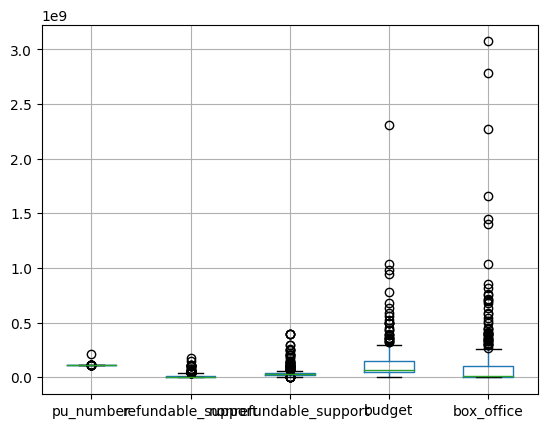

In [86]:
clean_data[clean_data['financing_source'] != 'none'].boxplot()
plt.show()

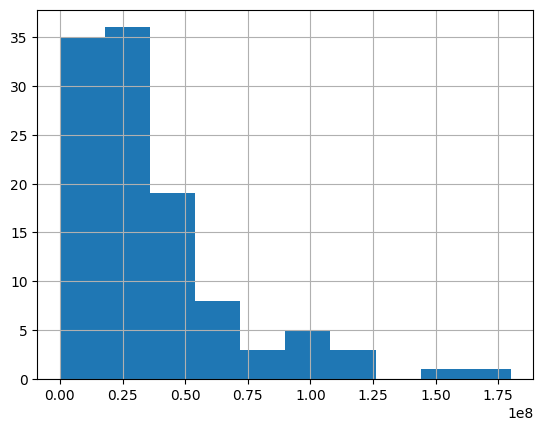

In [87]:
clean_data['refundable_support'].hist(range=(1,180000000))
plt.show()

In [88]:
# посмотрим на значения выше 125000000
clean_data.query('refundable_support > 125000000')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","Россия, Китай",О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.0","90,000,000.0","2,305,074,303.0",Фонд кино,5.8,"приключения,фэнтези","333,597,059.6"
3350,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,"150,000,000.0","300,000,000.0","684,200,536.0",Фонд кино,6.6,драма,"364,285,139.6"


Проверили на Кинопоиске, что это не выбросы

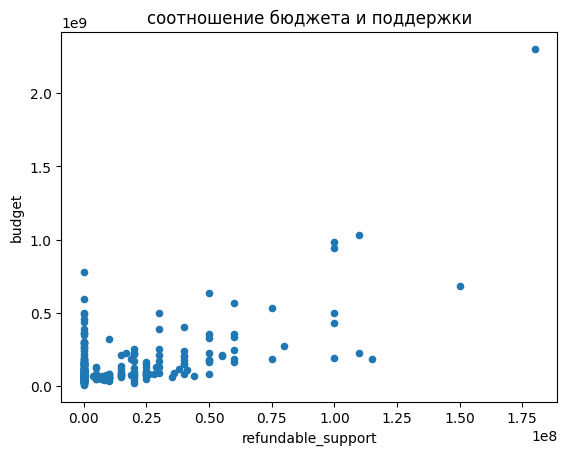

In [89]:
clean_data.plot(kind='scatter', x='refundable_support', y='budget', title='соотношение бюджета и поддержки')
plt.show()

In [90]:
clean_data['refundable_support'].value_counts()

0.0              6712
20,000,000.0       12
10,000,000.0       10
25,000,000.0       10
15,000,000.0        9
5,000,000.0         9
50,000,000.0        8
40,000,000.0        8
30,000,000.0        7
60,000,000.0        6
100,000,000.0       5
110,000,000.0       2
55,000,000.0        2
19,000,000.0        2
75,000,000.0        2
7,153,119.0         1
35,000,000.0        1
9,000,000.0         1
150,000,000.0       1
36,000,000.0        1
29,000,000.0        1
17,000,000.0        1
180,000,000.0       1
115,000,000.0       1
41,000,000.0        1
26,000,000.0        1
7,000,000.0         1
7,346,881.0         1
3,500,000.0         1
8,000,000.0         1
38,000,000.0        1
44,000,000.0        1
28,000,000.0        1
80,000,000.0        1
Name: refundable_support, dtype: int64

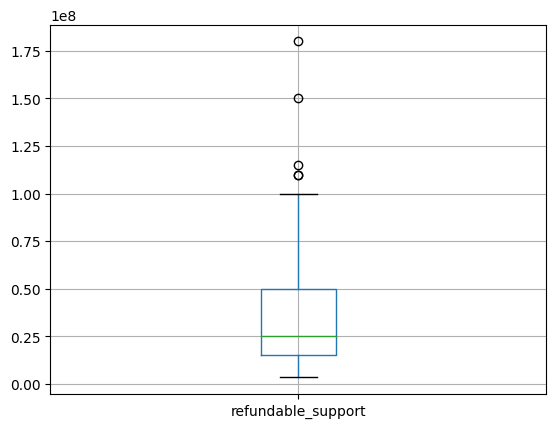

In [91]:
clean_data[(clean_data['financing_source'] != 'none') & (clean_data['refundable_support'] > 0)].boxplot(column='refundable_support')
plt.show()

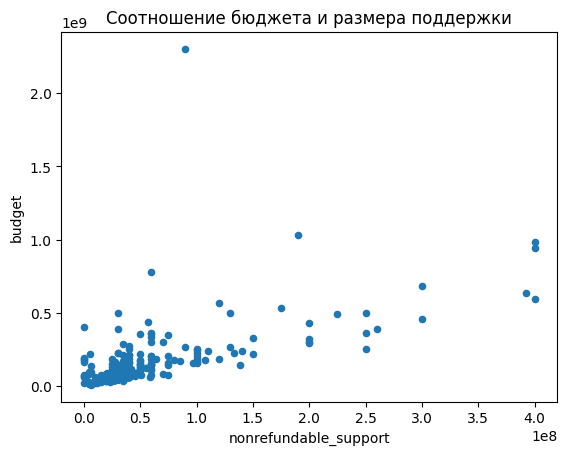

In [92]:
clean_data.plot(kind='scatter', x='nonrefundable_support', y='budget', title='Соотношение бюджета и размера поддержки')
plt.show()

### Шаг 2.6. Новые столбцы





- столбец с информацией о годе проката.

In [93]:
new_data = clean_data.copy()

# Выделим год из даты премьеры фильма.
new_data['show_start_date_year'] = new_data['show_start_date'].dt.year
new_data.head()


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year
1782,"Анжелика, маркиза ангелов",121031913,2013-12-12 12:00:00+00:00,Художественный,"Европа Корп., МонаФилм, ВилмаФилм",Франция,Ариэль Зейтун,"Эммануэль Жаклин, Павел Солк, Филипп Херинг",«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,8.0,"драма,мелодрама,приключения",0.0,2013
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,7.7,"аниме,мультфильм,фантастика",0.0,2012
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...","Германия, Нидерланды, Беларусь, Россия, Латвия",Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,6.5,"драма,военный,история",0.0,2012
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,5.5,"комедия,мелодрама",0.0,2012
2218,Прогулка по солнечному свету,121011614,2014-06-11 12:00:00+00:00,Художественный,"Вертиго Филмз, АйЭм Глобал",Великобритания,"Макс Джива, Дания Пасквини","Кэролайн Леви, Эллан Нибло, Джеймс Ричардсон",«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,6.1,"мюзикл,драма,мелодрама",0.0,2014


- два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [94]:
def first_value(string):
    """
    Возвращает первые значения из списка, который передаётся строкой
    """
    
    try:
        list = string.split(',')
        return list[0]
    except:
        return 'error'

In [95]:
new_data['main_director'] = new_data['director'].apply(first_value)
new_data['main_genre'] = new_data['genres'].apply(first_value)

#проверим переименование
new_data.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,main_director,main_genre
1782,"Анжелика, маркиза ангелов",121031913,2013-12-12 12:00:00+00:00,Художественный,"Европа Корп., МонаФилм, ВилмаФилм",Франция,Ариэль Зейтун,"Эммануэль Жаклин, Павел Солк, Филипп Херинг",«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,8.0,"драма,мелодрама,приключения",0.0,2013,Ариэль Зейтун,драма
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,7.7,"аниме,мультфильм,фантастика",0.0,2012,Мамору Хосода,аниме
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...","Германия, Нидерланды, Беларусь, Россия, Латвия",Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,6.5,"драма,военный,история",0.0,2012,Сергей Лозница,драма
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,5.5,"комедия,мелодрама",0.0,2012,К.Оганесян,комедия
2218,Прогулка по солнечному свету,121011614,2014-06-11 12:00:00+00:00,Художественный,"Вертиго Филмз, АйЭм Глобал",Великобритания,"Макс Джива, Дания Пасквини","Кэролайн Леви, Эллан Нибло, Джеймс Ричардсон",«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,6.1,"мюзикл,драма,мелодрама",0.0,2014,Макс Джива,мюзикл
2077,Курбан-роман. (История с жертвой).,111009614,2014-09-02 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,NaN,unknown,0.0,2014,С.Юзеев,unknown
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,unknown,«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,8.2,драма,0.0,2013,Н.Губенко,драма
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,5.8,"мелодрама,комедия,драма",0.0,2013,Пол Вайц,мелодрама
2684,ПУСТЬ ТАК БУДЕТ,111009815,2015-06-01 12:00:00+00:00,Художественный,"ООО ПРОДЮСЕРСКАЯ КОМПАНИЯ ""ДЕРЖАВА""",Россия,О.Смольников,"К.Лавров, Ю.Потапова, В.Бутер, С.Прудников, С....",«12+» - для детей старше 12 лет,0.0,0.0,NaN,none,NaN,unknown,0.0,2015,О.Смольников,unknown
3993,Стать Джоном Ленноном,121008610,2010-05-05 12:00:00+00:00,Художественный,"Авер Медиа, Экосси Филмз, Филм 4, Норс Вест Ви...","Канада, Великобритания",Сэм Тейлор Вуд,"Роберт Бернштейн, Кевин Лоудер, Дуглас Рэй",«16+» - для детей старше 16 лет,0.0,0.0,NaN,none,7.5,"драма,мелодрама,биография",0.0,2010,Сэм Тейлор Вуд,драма


- какую долю от общего бюджета фильма составляет государственная поддержка.

In [96]:
new_data['support'] = (new_data['nonrefundable_support']+new_data['refundable_support'])/new_data['budget']
new_data[new_data['support'] > 0].head()


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,main_director,main_genre,support
3148,Я-Учитель,111019715,2015-12-02 12:00:00+00:00,Художественный,"НП Киностудия детских и юношеских фильмов ""Иль...",Россия,С.Мокрицкий,А.Ковтунец,«12+» - для детей старше 12 лет,0.0,"35,000,000.0","91,000,000.0",Министерство культуры,7.4,"мелодрама,комедия","1,550.0",2015,С.Мокрицкий,мелодрама,0.4
2526,Вдвоем на льдине.,111011015,2015-06-25 12:00:00+00:00,Художественный,"ООО ""Первое творческое объединение""",Россия,"Н.Джорджадзе, В.Игнатьев","П.Поляков, И.Букреев",«12+» - для детей старше 12 лет,0.0,"26,500,000.0","37,943,652.0",Министерство культуры,6.6,мелодрама,"4,450.0",2015,Н.Джорджадзе,мелодрама,0.7
2802,Битва с экстрасенсами,111011315,2015-07-20 12:00:00+00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""КИНОБАЙТ""",Россия,И.Кордзаия,Е.Мелентьев,«12+» - для детей старше 12 лет,0.0,"25,900,000.0","59,560,746.0","Министерство культуры, Фонд кино",5.4,"фэнтези,приключения","6,000.0",2015,И.Кордзаия,фэнтези,0.4
3503,День До,111010916,2016-07-06 12:00:00+00:00,Художественный,"ООО ""Кинобюро"" по заказу ООО ""Среда и Ко""",Россия,"А.Котт, В.Котт, А.Карпиловский, Б.Хлебников","А.Цекало, А.Котт",«18+» - запрещено для детей,"25,000,000.0","25,000,000.0","90,822,766.0",Фонд кино,4.8,"драма,фантастика","9,000.0",2016,А.Котт,драма,0.6
2149,РЕВЕРБЕРАЦИЯ,111003515,2015-03-30 12:00:00+00:00,Художественный,"ООО ""Артлайт""",Россия,К.Сухарьков,А.Новиков,«18+» - запрещено для детей,0.0,"25,000,000.0","37,371,262.0",Министерство культуры,NaN,unknown,"19,820.0",2015,К.Сухарьков,unknown,0.7


### Промежуточные итоги

1. Проверили типы данных в датафрейме и преобразовали их там, где это необходимо:
- `show_start_date` — дата премьеры фильма - преобразовали в `datetime`
- `ratings` *—* рейтинг фильма на КиноПоиске - преобразовали в `float`. В рейтинге обнаружились значения с `%`. Мы проверили на Кинопоиске несколько фильмов - рейтинг ошибочен не только форматированием, но и значением.

Категорийные столбцы оставили строковыми

2. В 11 столбцах были обнаружены пропуски. Мы обработали их и оставили пропуски в 3х:
- `film_studio` - пропуски заполнили значением `unknown`
- `production_country` - пропуски заполнили значением `Россия`
- `director` - пропуски заполнили значением `unknown`
- `producer` - пропуски заполнили значением `unknown`
- `refundable_support` - пропуски заполнили `0`     
- `nonrefundable_support` - пропуски заполнили `0`
- `budget` - поддержки не было, но заполнить `0` кажется неправильно, так как бюджет всё же не нулевой                   
- `financing_source` - пропуски заполнили `none`         
- `ratings` - заполнить `0` кажется неправильно, так как рейтинг всё же не нулевой
- `genres` - пропуски заполнили `unknown`
- `box_office` - заполнить `0` кажется неправильно, так как рейтинг всё же не нулевой
3. Обработали дубликаты. В датафрейме много фильмов с одинаковыми данными, но разными прокатными удостоверениями. Также прокатные удостовериения, для которых была указана сумма в прокате `box_office` могли уже находиться в датафрейме под другими прокатными удостоверениями.
4. Общая проблема почти во всех категориальных столбцах:
- перечисления нексольких объектов в разном порядке (порядок не изменяли, так как он может означать важность)
- также встречаются разные способы разделения значений - через запятую или через `-` - исправили это на универсальные разделители
5. Столбец `budget` включал нулевые значения. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Значит, он не может быть меньше суммы поддержки. Приняли бюджет в этих строках равным сумме поддержки
6. Создали несколько новых столюцов для упрощения анализа

## Шаг 3. Исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Данные о прокате в кинотеатрах известны не для всех фильмов. 
- Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [97]:
# проверим диапазон значений
new_data['show_start_date_year'].unique()

array([2013, 2012, 2014, 2015, 2010, 2016, 2011, 2019, 2017, 2018])

In [98]:
# сводная таблица по фильмам
box_office_info = new_data.pivot_table(index='show_start_date_year', values=['title', 'box_office'], aggfunc='count')
box_office_info['pct'] = box_office_info['box_office']/box_office_info['title']
box_office_info

,box_office,title,pct
show_start_date_year,,,
2010,101,766,0.1
2011,108,484,0.2
2012,126,523,0.2
2013,182,590,0.3
2014,275,737,0.4
2015,458,668,0.7
2016,519,739,0.7
2017,357,500,0.7
2018,475,887,0.5


**Вывод:**  
В период с 2010 по 2019 год наименьшее количество фильмов в данных мы видим за 2011 год. В 2010 их было значительно больше, возврат к этому высокому уровню пришёлся на 2014-2016 годы. Затем в 2017м снова 500 значений и подъём в 2018м и 19м годах.
Данных по сборам в кинотеатрах с 2010 по 2014 годы достаточно мало относительно известных нам фильмов. с 2015го года доля с у казанной информацией о прокате - 0.5-0.7

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

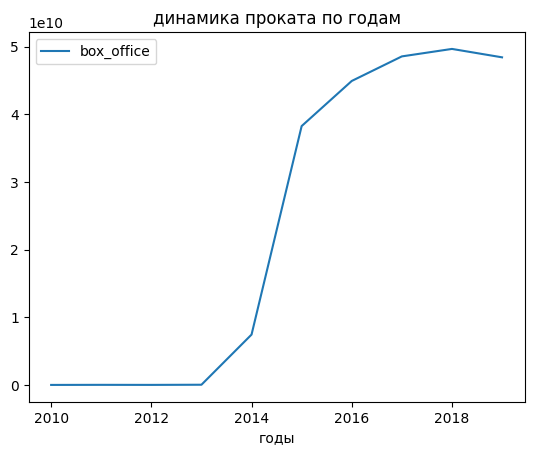

In [99]:
# сводная таблица по сумме в прокате
new_data.pivot_table(index='show_start_date_year', values='box_office', aggfunc='sum').plot(title='динамика проката по годам', xlabel='годы')
plt.show()

In [100]:
new_data.pivot_table(index='show_start_date_year', values='box_office', aggfunc='sum')

,box_office
show_start_date_year,
2010,"2,148,764.0"
2011,"13,997,065.0"
2012,"6,842,683.0"
2013,"29,775,666.2"
2014,"7,444,140,111.2"
2015,"38,263,253,872.1"
2016,"44,932,686,064.3"
2017,"48,563,707,217.5"
2018,"49,668,403,134.3"


**Вывод:**  
По известным данным в 2010 году сумма в прокате была минимальной. Максимальной - в 2018м году.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [101]:
new_data.pivot_table(index='show_start_date_year', values='box_office', aggfunc=['median', 'mean'])

,median,mean
,box_office,box_office
show_start_date_year,,
2010,"1,590.0","21,274.9"
2011,"2,952.5","129,602.5"
2012,"5,260.0","54,307.0"
2013,"3,475.0","163,602.6"
2014,"18,160.0","27,069,600.4"
2015,"4,777,096.2","83,544,222.4"
2016,"3,778,317.8","86,575,503.0"
2017,"9,968,340.0","136,032,793.3"


**Вывод:**  
с 2015 года средняя сумма сборов резко возросла, но тогда и данных о сборах появилось значительно больше

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. 
- Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? 

In [102]:
new_data[new_data['show_start_date_year'] >= 2015].pivot_table(index='show_start_date_year', columns='age_restriction', values='box_office', aggfunc='sum')

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_date_year,,,,,
2015,"273,367,887.8","13,616,082,008.9","10,537,061,602.6","5,137,465,401.4","8,699,276,971.4"
2016,"150,228,848.7","12,179,462,355.0","16,628,961,166.6","6,793,929,818.9","9,180,103,875.1"
2017,"229,598,930.0","7,851,427,660.7","18,745,042,900.1","9,651,495,581.0","12,086,142,145.8"
2018,"32,449,002.1","14,267,291,660.7","16,503,602,347.0","8,760,085,501.1","10,104,974,623.4"
2019,"17,746,066.8","12,680,198,773.7","12,753,418,984.6","10,121,796,303.6","12,852,548,650.9"


In [103]:
new_data[new_data['show_start_date_year'] >= 2015].pivot_table(index='show_start_date_year', columns='age_restriction', values='box_office', aggfunc='count')

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_date_year,,,,,
2015,37,73,165,131,52
2016,41,81,178,151,68
2017,3,41,121,147,45
2018,5,67,156,179,68
2019,3,85,178,183,81


In [104]:
new_data[(new_data['show_start_date_year'] == 2019) & (new_data['age_restriction'] == '«0+» - для любой зрительской аудитории')].sort_values(by='box_office').head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,main_director,main_genre,support
6935,Антон Чехов и Исаак Левитан: двойной портрет в...,112004019,2019-06-01 12:00:00+00:00,Документальный,"ООО ""КИНОСТУДИЯ ""РОЗА""",Россия,Г.Евтушенко,Г.Евтушенко,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,none,NaN,unknown,"81,000.0",2019,Г.Евтушенко,unknown,NaN
7386,Робокар Поли: Приключение в Брумтауне,124009719,2019-11-21 12:00:00+00:00,Анимационный,Рой Вижл,Южная Корея,Джун Янг Йом,"Донг Ву Лии, Сеонг Су Ким, Най Янг Квак",«0+» - для любой зрительской аудитории,0.0,0.0,NaN,none,NaN,unknown,"3,885,434.5",2019,Джун Янг Йом,unknown,NaN
6840,Букашки 2,124002019,2019-04-25 12:00:00+00:00,Анимационный,"Фьютрукен, ИфилмИнтертейнмент, Франс 3 Синема,...","Франция, КНР","Элен Жиро, Томас Сабо",Филипп Деларю,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,none,7.2,"мультфильм,комедия,приключения","13,779,632.3",2019,Элен Жиро,мультфильм,NaN
6400,Белка и Стрелка. Тайны космоса (1-5 серии),114007518,2019-02-15 12:00:00+00:00,Анимационный,"ООО ""КиноАтис""",Россия,"А.Рубецкой, Е.Шабанова","В.Сотсков, С.Зернов",«0+» - для любой зрительской аудитории,0.0,0.0,NaN,none,NaN,unknown,NaN,2019,А.Рубецкой,unknown,NaN
6562,МУЛЬТ в кино. Выпуск № 88,114009918,2019-01-05 12:00:00+00:00,Анимационный,"ООО ""Мульт в кино""",Россия,О Семёнова,П.Смирнов,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,none,NaN,unknown,NaN,2019,О Семёнова,unknown,NaN


**Вывод:**  
- 2015 - 12+
- 2016 - 16+
- 2017 - 16+
- 2018 - 16+
- 2019 - 0+

Категории `12+` и `16+` очень близки по сборам (кроме 2017 года), и собирают больше всего денег в указанный период. То, что категория 16+ вышла вперёд, вероятно, связано с ужесточением критериев категоризации (больше фильмов стало попадать в эту категорию)

В 2019 году лидером стала категория 0+ - в ней есть значительный вклад мультфильма "Букашки 2"

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

- сколько выделяют средств на поддержку кино. 
- хорошо ли окупаются такие фильмы
- какой у них рейтинг.

In [105]:
# выделим фильмы с поддержкой в отдельный датафрейм
supported = new_data[(clean_data['financing_source'] != 'none')]

In [106]:
supported.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 3148 to 7477
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   pu_number              332 non-null    int64              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               332 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

In [107]:
# описание количественных параметров
supported.describe()

,pu_number,refundable_support,nonrefundable_support,budget,box_office,show_start_date_year,support
count,332.0,332.0,332.0,332.0,318.0,332.0,332.0
mean,"111,593,819.1","11,864,457.8","48,980,988.9","131,422,395.8","132,432,420.0","2,016.7",0.5
std,"5,703,031.3","24,916,555.3","59,980,117.9","187,148,242.7","334,837,857.0",1.6,0.2
min,"111,000,115.0",0.0,0.0,"6,000,000.0","1,550.0","2,013.0",0.0
25%,"111,004,891.5",0.0,"25,000,000.0","45,524,799.5","1,236,675.5","2,015.0",0.4
50%,"111,010,367.0",0.0,"30,000,000.0","71,196,901.5","15,720,067.7","2,017.0",0.6
75%,"111,017,815.8","15,000,000.0","40,375,000.0","150,000,000.0","106,373,008.3","2,018.0",0.7
max,"214,010,116.0","180,000,000.0","400,000,000.0","2,305,074,303.0","3,073,568,690.8","2,019.0",1.0


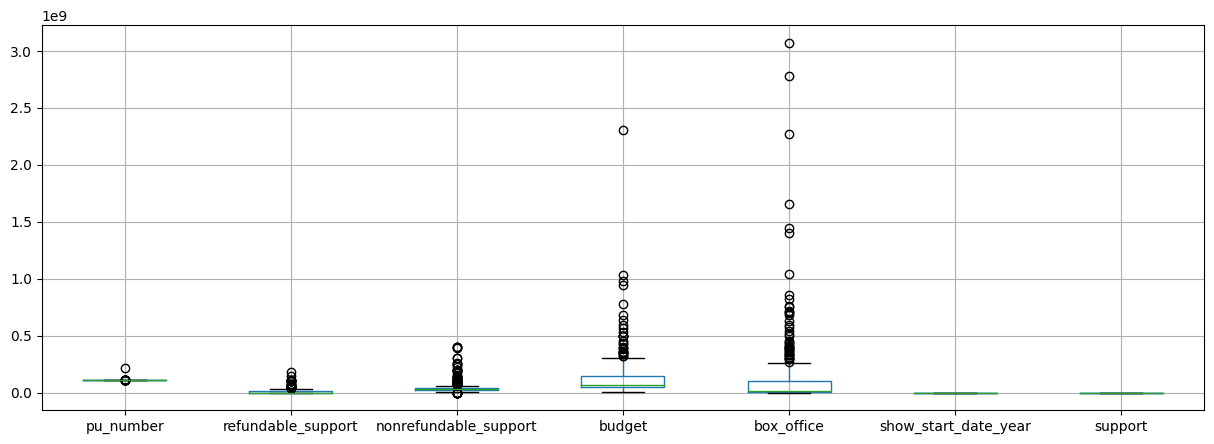

In [108]:
supported.boxplot(figsize=(15,5))
plt.show()

- `refundable_support` *—* объём возвратных средств государственной поддержки меньше, чем объём невозвратных средств (в среднем почти в 5 раз, и разброс значений небольшой)
- `nonrefundable_support` *—* объём невозвратных средств государственной поддержки чаще всего предоставляется от 0 до 40 000 000. 

Финансирование как правило составляет половину бюджета фильма.
**За исключением нескольких фильмов сборы меньше чем бюджет.**

- `ratings` *—* рейтинг фильма на КиноПоиске только у 314 из 332 - удалим пропуски и посмотрим отдельно на графике

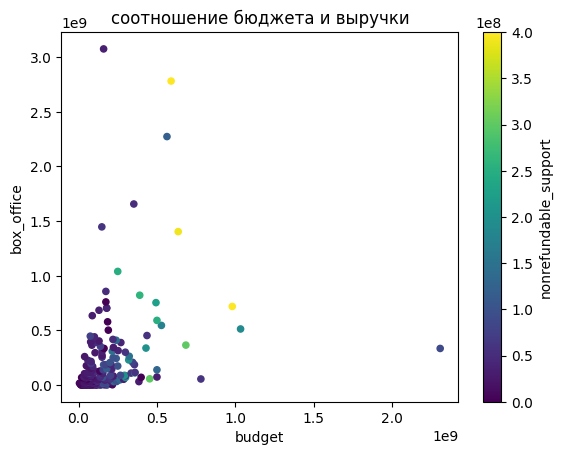

In [109]:
supported.plot(kind='scatter', c='nonrefundable_support', x='budget', y='box_office', colormap='viridis', title='соотношение бюджета и выручки')
plt.show()

In [110]:
# выделим фильмы, у которых сборы в прокате больше, чем бюджет
successful = supported.query('box_office > budget')
successful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 2873 to 7455
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  79 non-null     object             
 1   pu_number              79 non-null     int64              
 2   show_start_date        79 non-null     datetime64[ns, UTC]
 3   type                   79 non-null     object             
 4   film_studio            79 non-null     object             
 5   production_country     79 non-null     object             
 6   director               79 non-null     object             
 7   producer               79 non-null     object             
 8   age_restriction        79 non-null     object             
 9   refundable_support     79 non-null     float64            
 10  nonrefundable_support  79 non-null     float64            
 11  budget                 79 non-null     float64         

In [111]:
# параметры для анализа
supported.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,main_director,main_genre,support
3148,Я-Учитель,111019715,2015-12-02 12:00:00+00:00,Художественный,"НП Киностудия детских и юношеских фильмов ""Иль...",Россия,С.Мокрицкий,А.Ковтунец,«12+» - для детей старше 12 лет,0.0,"35,000,000.0","91,000,000.0",Министерство культуры,7.4,"мелодрама,комедия","1,550.0",2015,С.Мокрицкий,мелодрама,0.4
2526,Вдвоем на льдине.,111011015,2015-06-25 12:00:00+00:00,Художественный,"ООО ""Первое творческое объединение""",Россия,"Н.Джорджадзе, В.Игнатьев","П.Поляков, И.Букреев",«12+» - для детей старше 12 лет,0.0,"26,500,000.0","37,943,652.0",Министерство культуры,6.6,мелодрама,"4,450.0",2015,Н.Джорджадзе,мелодрама,0.7
2802,Битва с экстрасенсами,111011315,2015-07-20 12:00:00+00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""КИНОБАЙТ""",Россия,И.Кордзаия,Е.Мелентьев,«12+» - для детей старше 12 лет,0.0,"25,900,000.0","59,560,746.0","Министерство культуры, Фонд кино",5.4,"фэнтези,приключения","6,000.0",2015,И.Кордзаия,фэнтези,0.4
3503,День До,111010916,2016-07-06 12:00:00+00:00,Художественный,"ООО ""Кинобюро"" по заказу ООО ""Среда и Ко""",Россия,"А.Котт, В.Котт, А.Карпиловский, Б.Хлебников","А.Цекало, А.Котт",«18+» - запрещено для детей,"25,000,000.0","25,000,000.0","90,822,766.0",Фонд кино,4.8,"драма,фантастика","9,000.0",2016,А.Котт,драма,0.6
2149,РЕВЕРБЕРАЦИЯ,111003515,2015-03-30 12:00:00+00:00,Художественный,"ООО ""Артлайт""",Россия,К.Сухарьков,А.Новиков,«18+» - запрещено для детей,0.0,"25,000,000.0","37,371,262.0",Министерство культуры,NaN,unknown,"19,820.0",2015,К.Сухарьков,unknown,0.7


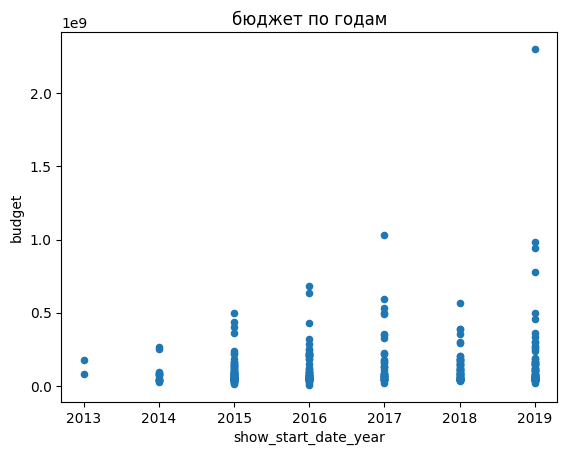

In [112]:
supported.plot(kind='scatter', x='show_start_date_year', y='budget', title='бюджет по годам')
plt.show()

In [113]:
supported.pivot_table(index='show_start_date_year', values=['budget', 'box_office'], aggfunc=['sum', 'count'])

sum                       count       
                           box_office           budget box_office budget
show_start_date_year                                                    
2013                     20,322,385.1    255,435,390.0          2      2
2014                  1,017,422,166.6  1,302,484,783.0         16     16
2015                  5,785,285,418.1  7,738,669,207.0         85     86
2016                  6,081,707,839.1  7,554,942,748.0         60     61
2017                 10,865,075,301.0  7,057,172,568.0         39     41
2018                  9,934,069,010.2  7,000,664,099.0         56     56
2019                  8,409,627,454.6 12,722,866,609.0         60     70

Начиная с 2015 года бюджет фильмов с гос. поддержкой был в сумме 7 - 7.5 млрд. рублей. в 2019м году - рекордные 12.7 млрд. При этом в 2015, 2016 и 2019 годах эти бюджеты не окупились.

In [114]:
supported.pivot_table(index='type', values='budget', aggfunc=['sum', 'count'])

,sum,count
,budget,budget
type,,
Анимационный,"5,909,423,882.0",31
Документальный,"33,000,000.0",1
Художественный,"37,689,811,522.0",300


В основном гос. поддержкой пользуются Художественные фильмы.

In [115]:
supported.pivot_table(index='main_genre', values='budget', aggfunc=['sum', 'count'])

,sum,count
,budget,budget
main_genre,,
unknown,"1,081,930,919.0",16
биография,"528,933,637.0",3
боевик,"683,436,808.0",6
военный,"1,285,906,825.0",9
детектив,"1,198,222,297.0",5
детский,"183,898,004.0",4
драма,"11,126,886,688.0",93
история,"2,145,062,206.0",4


Драма и комедия - наиболее часто пользуются гос. поддержкой

In [116]:
successful.pivot_table(index='main_genre', values='budget', aggfunc=['sum', 'count'])

,sum,count
,budget,budget
main_genre,,
unknown,"148,585,222.0",1
биография,"131,000,000.0",1
боевик,"230,000,000.0",2
военный,"533,884,000.0",3
драма,"3,606,499,446.0",14
история,"500,012,729.0",1
комедия,"2,938,970,219.0",31
мультфильм,"2,061,265,049.0",12


In [117]:
supported.pivot_table(index='age_restriction', values='budget', aggfunc=['sum', 'count'])

,sum,count
,budget,budget
age_restriction,,
«0+» - для любой зрительской аудитории,"902,984,585.0",8
«12+» - для детей старше 12 лет,"15,587,946,009.0",106
«16+» - для детей старше 16 лет,"11,841,591,936.0",125
«18+» - запрещено для детей,"2,309,837,155.0",28
«6+» - для детей старше 6 лет,"12,989,875,719.0",65


In [124]:
successful.pivot_table(index='age_restriction', values='budget', aggfunc=['sum', 'count'])

,sum,count
,budget,budget
age_restriction,,
«0+» - для любой зрительской аудитории,"252,489,571.0",1
«12+» - для детей старше 12 лет,"5,849,617,604.0",30
«16+» - для детей старше 16 лет,"1,905,974,133.0",25
«18+» - запрещено для детей,"129,853,412.0",2
«6+» - для детей старше 6 лет,"4,544,534,769.0",21


In [119]:
# данные об оценках для фильмов с господдержкой и для тех, у которых сумма сборов превысила бюджет
supported_ratings = supported.pivot_table(index='ratings', values='budget', aggfunc=['sum', 'count'])
successful_ratings = successful.pivot_table(index='ratings', values='budget', aggfunc=['sum', 'count'])

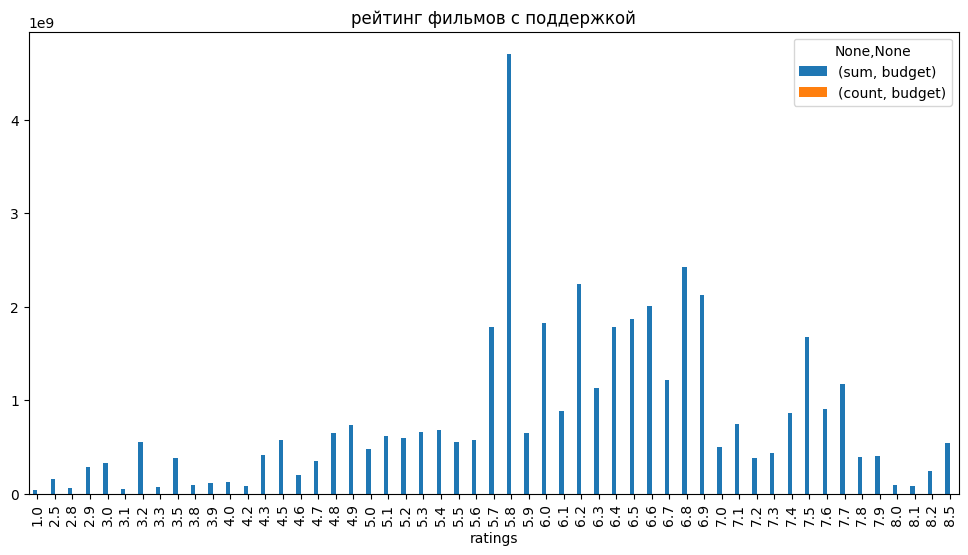

In [120]:
supported_ratings.plot(kind='bar', figsize=(12,6), title='рейтинг фильмов с поддержкой')
plt.show()

наиболее частые оценки - 5.7 - 6.9

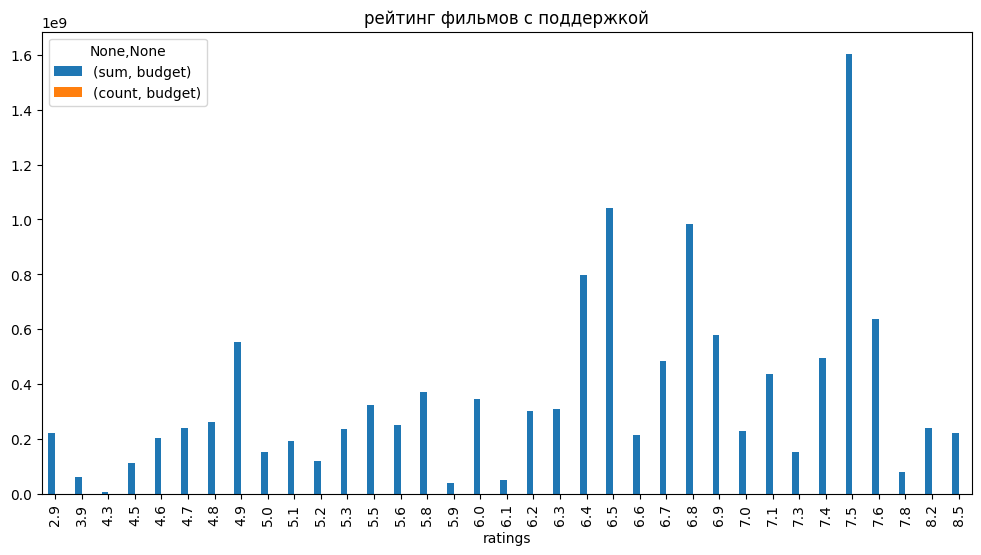

In [121]:
successful_ratings.plot(kind='bar', figsize=(12,6), title='рейтинг фильмов с поддержкой')
plt.show()

Фильмы, достигшие кассового успеха, соответственно и оценки имеют выше - чаще 6.4 - 7.6

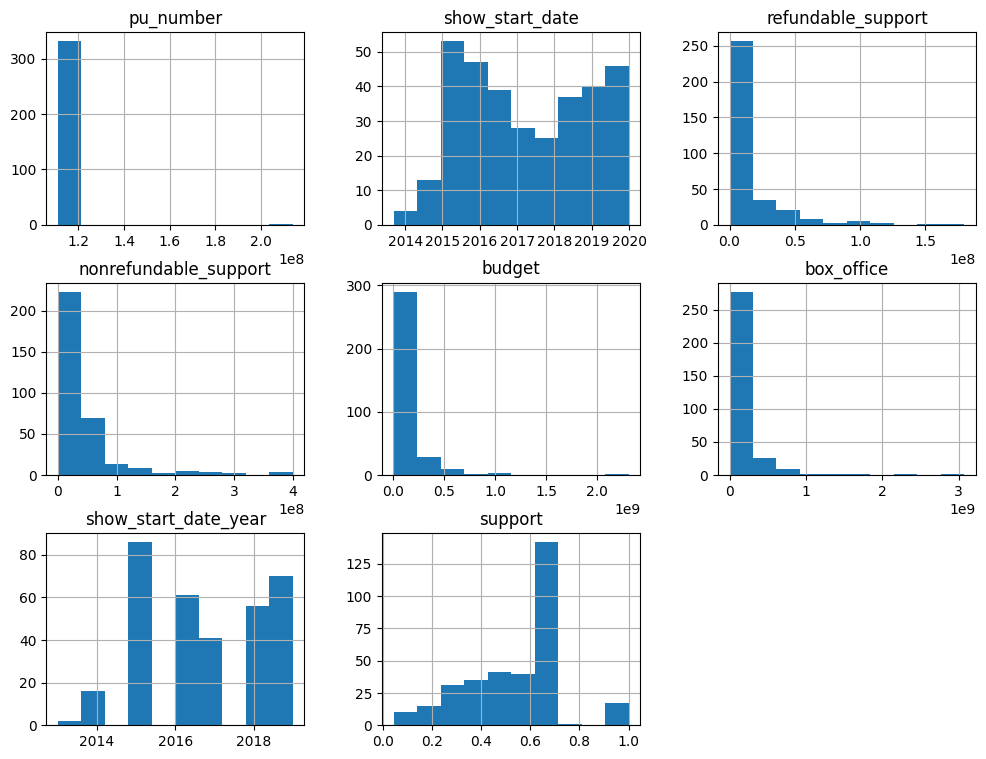

In [122]:
supported.hist(figsize=(12,9))
plt.show()

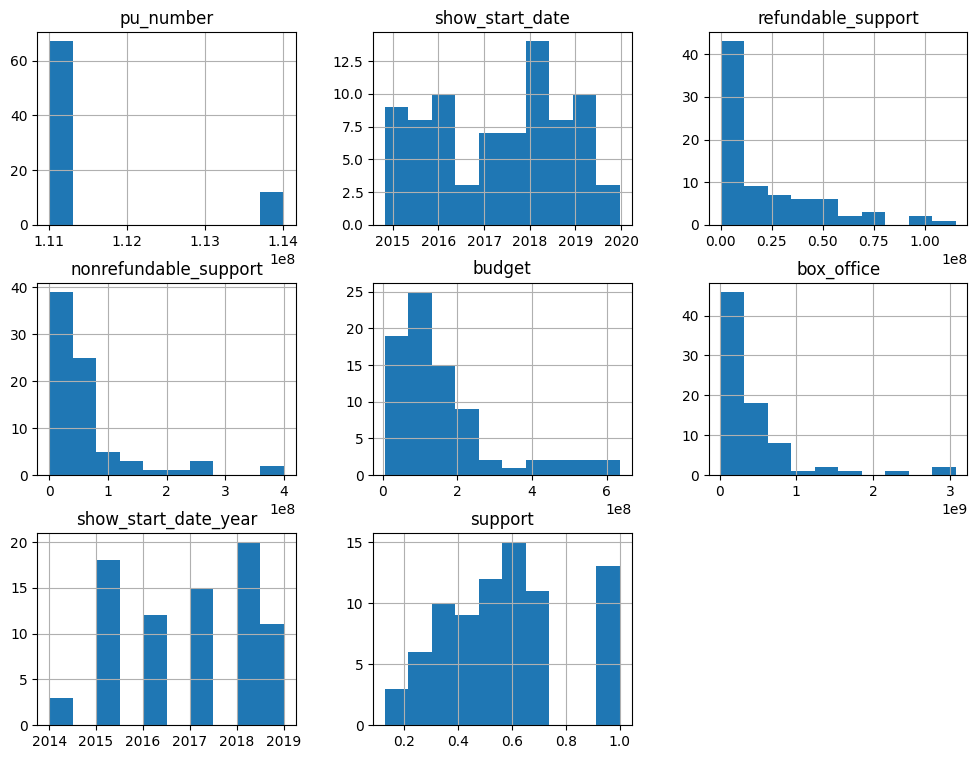

In [123]:
successful.hist(figsize=(12,9))
plt.show()

### Шаг 5. Общий вывод

#### Краткий обзор проведённой работы. 
В приведённом исследовании стояла задача изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. 
Ответить на вопрос, насколько фильмы с государственной поддержкой интересны зрителю.

Мы считали данные из двух файлов и объединили датафреймы по номеру прокатного удостоверения

Увидели, что:
- Есть пропуски
- Есть дублирующиеся названия
- Много категорийных столбцов с текстовым наполнением - это приводит к неявным дубликатам из-за лишних символов, неодинакового порядка перечислений и различных разделителей

В первой части мы готовили данные для исследования, что сделали:
1. Проверили типы данных в датафрейме и преобразовали их там, где это необходимо:
- `show_start_date` — дата премьеры фильма - преобразовали в `datetime`
- `ratings` *—* рейтинг фильма на КиноПоиске - преобразовали в `float`. В рейтинге обнаружились значения с `%`. Мы проверили на Кинопоиске несколько фильмов - рейтинг ошибочен не только форматированием, но и значением.

Категорийные столбцы оставили строковыми

2. В 11 столбцах были обнаружены пропуски. Мы обработали их и оставили пропуски в 3х:
- `film_studio` - пропуски заполнили значением `unknown`
- `production_country` - пропуски заполнили значением `Россия`
- `director` - пропуски заполнили значением `unknown`
- `producer` - пропуски заполнили значением `unknown`
- `refundable_support` - пропуски заполнили `0`     
- `nonrefundable_support` - пропуски заполнили `0`
- `budget` - поддержки не было, но заполнить `0` кажется неправильно, так как бюджет всё же не нулевой                   
- `financing_source` - пропуски заполнили `none`         
- `ratings` - заполнить `0` кажется неправильно, так как рейтинг всё же не нулевой
- `genres` - пропуски заполнили `unknown`
- `box_office` - заполнить `0` кажется неправильно, так как рейтинг всё же не нулевой
3. Обработали дубликаты. В датафрейме много фильмов с одинаковыми данными, но разными прокатными удостоверениями. Также прокатные удостовериения, для которых была указана сумма в прокате `box_office` могли уже находиться в датафрейме под другими прокатными удостоверениями.
4. Общая проблема почти во всех категориальных столбцах:
- перечисления нексольких объектов в разном порядке (порядок не изменяли, так как он может означать важность)
- также встречаются разные способы разделения значений - через запятую или через `-` - исправили это на универсальные разделители
5. Столбец `budget` включал нулевые значения. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Значит, он не может быть меньше суммы поддержки. Приняли бюджет в этих строках равным сумме поддержки
6. Создали несколько новых столюцов для упрощения анализа

#### Главные выводы. 
- Начиная с 2015 года бюджет фильмов с гос. поддержкой был в сумме 7 - 7.5 млрд. рублей. в 2019м году - рекордные 12.7 млрд. При этом в 2015, 2016 и 2019 годах эти бюджеты не окупились.
- наиболее частые оценки для фильмов с господдержкой - 5.7 - 6.9 - это средний результат, зрители редко ставят им высокие оценки (максимум 8.5)
- Фильмы, достигшие кассового успеха, соответственно и оценки имеют выше - чаще 6.4 - 7.6
- Драма и комедия - наиболее часто пользуются гос. поддержкой, однако Комедия значительно чаще, чем драма имеет кассовый успех.


#### Рекомендации.
Есть рекомендации к данным:
- использовать единый формат перечисления категорий и их разделители, главные значения категорий вывести в отдельные столбцы
- если данные не известны, задавать для них какое-то значение, а не пропускать
